### Table of Contents
* [ Goals & notebook summary](#goals)
* [Summary of added functionality](#summary)
* [Imports and setup](#init)
* [Details](#details)
  * [Create TPM](#create_tpm)
  * [Create Network](#create_net)

## Imports and setup <a id=init>

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from collections import Counter
import functools, operator

import pyphi
from pyphi.examples import basic_noisy_selfloop_network
import pyphi.data_models as dm  # Prototype code

### From [TPM conventions](https://pyphi.readthedocs.io/en/latest/conventions.html) - legacy version

In [2]:
net0 = basic_noisy_selfloop_network()
print(f'Legacy net={net0} \nlabels={list(net0.node_labels)}\n')
print(f'tpm={net0.tpm}')
print(f'tpm.shape={net0.tpm.shape}\n')
print(f'cm={net0.cm}')

Legacy net=Network([[[[0.271 0.19  0.244]
   [0.919 0.91  0.756]]

  [[0.919 0.91  0.756]
   [0.991 0.99  0.244]]]


 [[[0.919 0.19  0.756]
   [0.991 0.91  0.244]]

  [[0.991 0.91  0.244]
   [0.999 0.99  0.756]]]], cm=[[1 0 1]
 [1 1 1]
 [1 1 1]]) 
labels=['n0', 'n1', 'n2']

tpm=[[[[0.271 0.19  0.244]
   [0.919 0.91  0.756]]

  [[0.919 0.91  0.756]
   [0.991 0.99  0.244]]]


 [[[0.919 0.19  0.756]
   [0.991 0.91  0.244]]

  [[0.991 0.91  0.244]
   [0.999 0.99  0.756]]]]
tpm.shape=(2, 2, 2, 3)

cm=[[1 0 1]
 [1 1 1]
 [1 1 1]]


State-by-State form is 2^N x 2^N  (2=number of states per node)

In [3]:
sbn = net0.tpm
sbs = pyphi.convert.sbn2sbs(net0.tpm)
print(f'tpm sbs.shape={sbs.shape}')

tpm sbs.shape=(8, 8)


In [4]:
pd.DataFrame(sbs)

,0,1,2,3,4,5,6,7
0,0.446410,0.165950,0.104714,0.038926,0.144080,0.053560,0.033796,0.012564
1,0.016009,0.181631,0.003755,0.042605,0.049601,0.562759,0.011635,0.132005
2,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
3,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
4,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
5,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
6,0.000068,0.007492,0.006736,0.741704,0.000022,0.002418,0.002174,0.239386
7,0.000002,0.002438,0.000242,0.241318,0.000008,0.007552,0.000748,0.747692


### New version of Network

In [5]:
# New version of Legacy Network
n2 = dm.Network()
n2.from_legacy(net0)
n2

Network(-7ffff80f74b71faf): node_connectivity: (3, 3), transitions: (8, 8)

In [6]:
n2.tpm

,000,001,010,011,100,101,110,111
000,0.446410,0.165950,0.104714,0.038926,0.144080,0.053560,0.033796,0.012564
001,0.016009,0.181631,0.003755,0.042605,0.049601,0.562759,0.011635,0.132005
010,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
011,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
100,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
101,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
110,0.000068,0.007492,0.006736,0.741704,0.000022,0.002418,0.002174,0.239386
111,0.000002,0.002438,0.000242,0.241318,0.000008,0.007552,0.000748,0.747692


States are by node. Nodes retained by network.

In [7]:
n2.node_labels

[0, 1]

### The following acts roughly like [state-by-node form](https://pyphi.readthedocs.io/en/latest/conventions.html#multidimensional-state-by-node-form)
But, instead of being high dimensional, its 2 dimensions and columns by state, not node. (But columns by node will not work for nodes with states > 2.

In [8]:
n2.tpm.loc[['010']]  # get one row

,000,001,010,011,100,101,110,111
010,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235


In [9]:
n2.tpm.loc[['010']].to_numpy()  # get one row

array([[0.00177876, 0.02018124, 0.01798524, 0.20405476, 0.00551124,
        0.06252876, 0.05572476, 0.63223524]])

In [10]:
n2.tpm.to_numpy()

array([[4.4641044e-01, 1.6594956e-01, 1.0471356e-01, 3.8926440e-02,
        1.4407956e-01, 5.3560440e-02, 3.3796440e-02, 1.2563560e-02],
       [1.6008840e-02, 1.8163116e-01, 3.7551600e-03, 4.2604840e-02,
        4.9601160e-02, 5.6275884e-01, 1.1634840e-02, 1.3200516e-01],
       [1.7787600e-03, 2.0181240e-02, 1.7985240e-02, 2.0405476e-01,
        5.5112400e-03, 6.2528760e-02, 5.5724760e-02, 6.3223524e-01],
       [6.1236000e-04, 6.7427640e-02, 6.1916400e-03, 6.8176836e-01,
        1.9764000e-04, 2.1762360e-02, 1.9983600e-03, 2.2004164e-01],
       [1.7787600e-03, 2.0181240e-02, 1.7985240e-02, 2.0405476e-01,
        5.5112400e-03, 6.2528760e-02, 5.5724760e-02, 6.3223524e-01],
       [6.1236000e-04, 6.7427640e-02, 6.1916400e-03, 6.8176836e-01,
        1.9764000e-04, 2.1762360e-02, 1.9983600e-03, 2.2004164e-01],
       [6.8040000e-05, 7.4919600e-03, 6.7359600e-03, 7.4170404e-01,
        2.1960000e-05, 2.4180400e-03, 2.1740400e-03, 2.3938596e-01],
       [2.4400000e-06, 2.4375600e-03, 2.4

In [11]:
n2.cm

,n0,n1,n2
n0,1,0,1
n1,1,1,1
n2,1,1,1


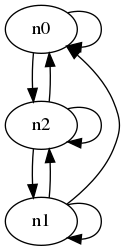

In [12]:
png='basic_noisy_selfloop_network.png'
n2.cm_graph(pngfile=png)
Image(filename=png)

Gotta *wonder if the above node ordering is what was intended*! (Or, did they mean to eliminate connection between n0->n2?)

## Non-square TPM

In [13]:
# Make TPM for 3 inputs, 1 ouput
probs = np.array([[0.68893508, 0.40176953],
                      [0.44095309, 0.84035902],
                      [0.09975545, 0.58225631],
                      [0.86475645, 0.18650795],
                      [0.50721989, 0.86299773],
                      [0.62045787, 0.90525779],
                      [0.88270204, 0.46225991],
                      [0.51548114, 0.89159624]])
tp = dm.TransProb(list('ABC'),list('D'),probs)
tp.df

,0,1
000,0.688935,0.401770
001,0.440953,0.840359
010,0.099755,0.582256
011,0.864756,0.186508
100,0.507220,0.862998
101,0.620458,0.905258
110,0.882702,0.462260
111,0.515481,0.891596


In [14]:
print(f'in_nodes={tp.in_nodes}')
print(f'out_nodes={tp.out_nodes}')

in_nodes=['A', 'B', 'C']
out_nodes=['D']


## Evolve TPM through states

In [15]:
sqtpm = n2._tp
allstates = list(sqtpm.df.index)
sqtpm.df

,000,001,010,011,100,101,110,111
000,0.446410,0.165950,0.104714,0.038926,0.144080,0.053560,0.033796,0.012564
001,0.016009,0.181631,0.003755,0.042605,0.049601,0.562759,0.011635,0.132005
010,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
011,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
100,0.001779,0.020181,0.017985,0.204055,0.005511,0.062529,0.055725,0.632235
101,0.000612,0.067428,0.006192,0.681768,0.000198,0.021762,0.001998,0.220042
110,0.000068,0.007492,0.006736,0.741704,0.000022,0.002418,0.002174,0.239386
111,0.000002,0.002438,0.000242,0.241318,0.000008,0.007552,0.000748,0.747692


#### Look at graph with low probability edges filtered out.
Represents above matrix after threshold applied.

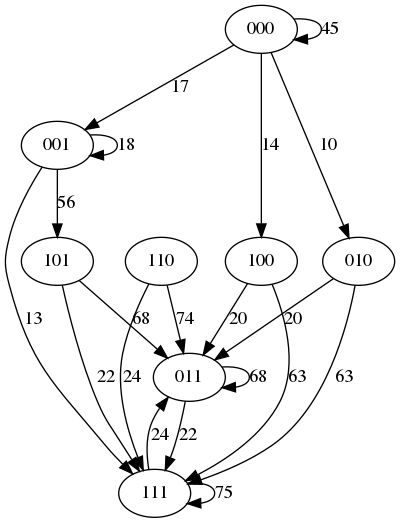

In [16]:
sqtpm.graph(pngfile='tpm.png', min_prob=0.10)
Image(filename='tpm.png') 

#### Show transition probabilities from state 001 to all other states.

In [17]:
sqtpm.df['001']

000    0.165950
001    0.181631
010    0.020181
011    0.067428
100    0.020181
101    0.067428
110    0.007492
111    0.002438
Name: 001, dtype: float64

#### Look at actual counts of transitions starting at 001.
These should roughly match the probabilities above.

In [18]:
c = Counter(sqtpm.next_state(current='001') for i in range(1000))
c.most_common()

[('001', 353),
 ('000', 314),
 ('101', 126),
 ('011', 118),
 ('100', 37),
 ('010', 37),
 ('110', 14),
 ('111', 1)]

#### Start at given state and record a bunch of transitions through evolution.

In [19]:
sqtpm.set_state('001')
[sqtpm.next_state() for i in range(10)]

['000', '000', '000', '000', '000', '000', '000', '000', '000', '000']

In [20]:
sqtpm.set_state('011')
[sqtpm.next_state() for i in range(10)]

['011', '110', '100', '000', '000', '000', '000', '000', '000', '000']

#### Trace transitions using all possible starting points

In [21]:
tt = dict([(s,[sqtpm.next_state(current=s) for i in range(10)]) for s in list(allstates)])
tt

{'000': ['000', '000', '000', '000', '000', '000', '000', '001', '000', '000'],
 '001': ['000', '001', '101', '001', '000', '001', '000', '001', '001', '111'],
 '010': ['010', '100', '110', '000', '000', '000', '000', '000', '000', '000'],
 '011': ['100', '101', '011', '110', '111', '110', '111', '101', '011', '110'],
 '100': ['001', '000', '000', '000', '100', '001', '000', '010', '000', '000'],
 '101': ['001', '001', '010', '001', '001', '001', '001', '001', '001', '000'],
 '110': ['100', '010', '010', '010', '100', '010', '000', '001', '110', '100'],
 '111': ['111', '001', '100', '010', '100', '100', '100', '010', '101', '111']}

#### How often to we visit each state?

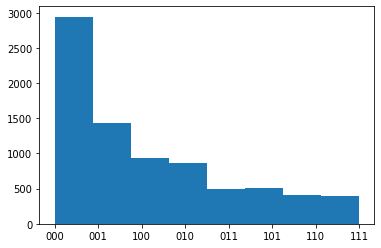

In [22]:
# Each state as start, N trials
many = dict([(s,[sqtpm.next_state(current=s) for i in range(1000)]) for s in list(allstates)])
mm = functools.reduce(operator.concat,list(many.values()), [])
(n,bins,patches) = plt.hist(mm,bins=len(allstates))

In [23]:
p=np.random.random((8,4))
tp1 = dm.TransProb(list('ABC'),list('DE'),p)
tp1.df

,00,01,10,11
000,0.151700,0.949998,0.702074,0.547388
001,0.993348,0.917169,0.856438,0.196234
010,0.291485,0.171130,0.441064,0.007360
011,0.858937,0.044507,0.762121,0.467839
100,0.800997,0.155327,0.793695,0.386895
101,0.596252,0.488970,0.440339,0.616615
110,0.474513,0.177829,0.976095,0.337167
111,0.847760,0.493042,0.344914,0.571198


In [24]:
print(tp1.in_nodes)
print(tp1.out_nodes)

['A', 'B', 'C']
['D', 'E']


In [25]:
tp1.df.dtypes

00    float64
01    float64
10    float64
11    float64
dtype: object